Jepretan Layar 2024-01-06 pukul 14.22.47.png

***Customer segmentation*** merupakan proses mengelompokkan data pelanggan yang memiliki karakteristik yang mirip untuk memahami lebih baik mengenai siapa pelanggan dari bisnis kita sehingga kita dapat menyesuaikan strategi pemasaran, penjualan, dan layanan pelanggan yang lebih efektif. Karakteristik pelanggan yang bisa diamati untuk customer segmentation ini adalah preferensi, perilaku, atau kebutuhan dari pelanggan. Berdasarkan data yang ada kita dapat menyusun strategi yang lebih terfokus, seperti penentuan harga yang lebih tepat, pengembangan produk atau layanan yang sesuai dengan kebutuhan kelompok tertentu, serta pendekatan pemasaran yang lebih efisien.

# Goal-Setting

> Set the goal membantu dalam memahami dengan jelas tujuan bisnis yang ingin dicapai sehingga kita dapat fokus pada hasil yang sesuai dengan kebutuhan bisnis.

**Problem**
*   Berapa kelompok yang terbentuk dari pelanggan-pelanggan yang memiliki karakteristik mirip?
*   Bagaimana karakteristik dari setiap kelompok pelanggan yang terbentuk?

**Objective**
*   Menganalisa korelasi antara beberapa variabel
*   Mengelompokkan pelanggan-pelanggan berdasarkan karakteristiknya dan mengamati setiap kelompok yang terbentuk

[Rekomendasi Artikel](https://towardsdatascience.com/the-power-of-goal-setting-for-your-data-science-project-9338bf475abd)



# Data Retrieval

Data retrieval merupakan proses mengambil atau mendapatkan data dari sumbernya untuk digunakan dalam analisis, pemodelan, atau visualisasi. Proses ini melibatkan pencarian, ekstraksi, dan pemilihan data dari berbagai sumber untuk memastikan bahwa data yang diperoleh sesuai dengan kebutuhan analisis yang akan dilakukan.

Untuk studi kasus kali ini, kita memakai dataset yang tersedia di situs Kaggle. Dataset ini memuat data pelanggan mengenai profil diri, jumlah produk yang dibeli, promosi yang diterima pelanggan, dan tempat belanja yang sering dikunjungi pelanggan. [Sumber Data](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

In [ ]:
# mengakses google drive supaya dapat membaca dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pandas adalah salah satu pustaka (library) populer dalam bahasa pemrograman Python yang berguna dalam membersihkan, memproses, dan menganalisis data dalam proyek data science.




In [ ]:
# memanggil library yang dibutuhkan
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Electives/dataset.csv', sep="\t")
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

üåù *pertama-tama, mari kita amati terlebih dahulu atribut-atribut yang ada pada dataset ini* üßê

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Profil Pelanggan
* ID: nomor unik pada setiap pelanggan (identifier)
* Year_Birth: tahun kelahiran
* Education: tingkat pendidikan
* Marital_Status: status pernikahan
* Income: pendapatan rumah tangga setiap tahun
* Kidhome: Jumlah anak-anak dalam rumah
* Teenhome: Jumlah remaja dalam rumah
* Dt_Customer: Tanggal terdaftar sebagai pelanggan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: Pernah atau tidak komplain dalam 2 tahun terakhir

Produk
* MntWines: Jumlah pembelian wine dalam 2 tahun terakhir
* MntFruits: Jumlah pembelian buah dalam 2 tahun terakhir
* MntMeatProducts: Jumlah pembelian daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah pembelian ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah pembelian makanan manis dalam 2 tahun terakhir
* MntGoldProds: Jumlah pembelian emas dalam 2 tahun terakhir

Promosi
* NumDealsPurchases: Jumlah pembelian yang menggunakan diskon
* AcceptedCmp1: Mendapatkan penawaran diskon atau tidak pada kampanye promosi pertama
* AcceptedCmp2: Mendapatkan penawaran diskon atau tidak pada kampanye promosi kedua
* AcceptedCmp3: Mendapatkan penawaran diskon atau tidak pada kampanye promosi ketiga
* AcceptedCmp4: Mendapatkan penawaran diskon atau tidak pada kampanye promosi keempat
* AcceptedCmp5: Mendapatkan penawaran diskon atau tidak pada kampanye promosi pertama
* Response: Mendapatkan penawaran diskon atau tidak pada kampanye promosi terakhir

Tempat berbelanja
* NumWebPurchases: Jumlah pembelian melalui website
* NumCatalogPurchases: Jumlah pembelian menggunakan katalog
* NumStorePurchases: Jumlah pembelian dengan datang ke toko
* NumWebVisitsMonth: Jumlah kunjungan ke website pada bulan terakhir

# Data Preparation

Data preparation merupakan proses menyiapkan *raw data* supaya dapat diolah dan dianalisis lebih lanjut.

## Data Cleansing

Data cleansing merupakan proses untuk mengidentifikasi, menangani, dan memperbaiki ketidaksempurnaan dalam data.

### Handle Missing Values

keberadaan nilai yang hilang (NaN) dapat mempengaruhi analisis data dan menghasilkan kesimpulan yang tidak akurat.

In [ ]:
# mencari tahu kolom mana saja yang memiliki missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

üò± *Ternyata hanya kolom Income yang memiliki 24 baris data yang nilainya NaN.* üò±

maka kita dapat melakukan pendekatan mengganti nilai NaN dengan rata-rata income yang dimiliki oleh pelanggan berdasarkan status pernikahannya.

In [ ]:
# memeriksa baris data pada kolom Income yang memiliki NaN value
df[df['Income'].isna()][['Marital_Status', 'Income']].head(2)

Marital_Status  Income
10        Married     NaN
27         Single     NaN

In [ ]:
# mengisi baris data pada kolom Income yang memiliki NaN value
# dengan nilai rata-rata Income berdasarkan status pernikahan
mean_income = df.groupby('Marital_Status')['Income'].transform('mean')
df['Income'] = df['Income'].fillna(mean_income)

In [ ]:
# memeriksa kembali baris data pada kolom Income yang sebelumnya memiliki NaN value
df.loc[[10,27]][['Marital_Status', 'Income']]

Marital_Status        Income
10        Married  51724.978996
27         Single  50995.350318

Rekomendasi:
* [Video](https://www.youtube.com/watch?v=v0HItX1xhNg)
* [Artikel](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)



### Drop Unsignificant Column

In [ ]:
# memeriksa jumlah baris dan kolom pada datadet
df.shape

(2240, 29)

In [ ]:
# memeriksa jumlah nilai yang berbeda pada setiap kolom
df.nunique(axis=0)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1978
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Pada dataset, terdapat baris sejumlah 2240. sedangkan kolom Index memiliki 2240 nilai yang berbeda atau distinct. Untuk case ini, kolom ID perlu dihapus karena hanya berisi identifikasi unik untuk setiap baris dalam dataset tetapi tidak memberikan informasi prediktif yang berguna untuk tujuan analisis atau pengembangan model prediksi.

Selain itu, Kolom Z_CostContact dan Z_Revenue merupakan kolom hanya berisi satu nilai saja (redundant) sehingga perlu dihapus untuk efensiensi komputasi dan tidak menjadi noise untuk pemroresan selanjutnya.

In [ ]:
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
df.shape

(2240, 26)

## Data Transformation

### Combine the columns

Proses ini melibatkan penggabungan beberapa kolom menjadi satu kolom dengan tujuan untuk merangkum data dalam format yang lebih ringkas dan mudah dimengerti.

Kolom Kidhome dan Teenhome dapat dijumlahkan dan dimasukkan ke dalam kolom baru bernama children, hal ini akan memudahkan pemahaman berapa anak yang tinggal di rumah pelanggan selain orang dewasa.

In [ ]:
# membuat kolom baru yang merupakan penambahan antara nilai Kidhome dan Teenhome
df['children'] = df['Kidhome'] + df['Teenhome']

# menghapus kolom Kidhome dan Teenhome
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

# memeriksa dataframe
df.head(3)

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0        1957  Graduation         Single  58138.0  04-09-2012       58   
1        1954  Graduation         Single  46344.0  08-03-2014       38   
2        1965  Graduation       Together  71613.0  21-08-2013       26   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0       635         88              546              172  ...   
1        11          1                6                2  ...   
2       426         49              127              111  ...   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  children  
0             0             0             0         0         1         0  
1             0             0             0         0         0         2  
2             0             0             0         0         0         0  

[3 rows x 25 columns]

Kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, dan Response dapat dijumlahkan lalu dimasukkan ke dalam kolom baru bernama AcceptedCmp yang memuat memuat informasi seberapa banyak pelanggan tersebut menerima penawaran diskon.

In [ ]:
df['AcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
df.head(3)

Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0        1957  Graduation         Single  58138.0  04-09-2012       58   
1        1954  Graduation         Single  46344.0  08-03-2014       38   
2        1965  Graduation       Together  71613.0  21-08-2013       26   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   

   NumStorePurchases  NumWebVisitsMonth  Complain  children  AcceptedCmp  
0                  4                  7         0         0            1  
1                  2                  5         0         2            0  
2                 10                  4         0         0            0

Kolom MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds perlu dijumlahkan lalu dimasukkan ke dalam kolom baru bernama Product untuk memuat jumlah produk yang telah dibeli selama 2 tahun terakhir.

Kolom NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumStorePurchase perlu dijumlahkan lalu dimasukkan ke dalam kolom baru bernama Purchases untuk memuat jumlah pembelian yang dilakukan selama 2 tahun terakhir.

Untuk kolom purchases dan product tidak menghapus kolom-kolom lama karena kolom-kolom lama masih dapat bermanfaat untuk analisis selanjutnya.

In [ ]:
df['Products'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

### Date Treatment

Kolom Dt_Customer yang bertipe object kita dapat ubah menjadi informasi yang bermakna dengan menghitung berapa lama hari pelanggan telah terdaftar.

In [ ]:
import datetime as dt

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Days_After_Registered'] = df['Dt_Customer'].subtract(dt.datetime.now()).dt.days.abs()
df = df.drop('Dt_Customer', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             2240 non-null   int64  
 1   Education              2240 non-null   object 
 2   Marital_Status         2240 non-null   object 
 3   Income                 2240 non-null   float64
 4   Recency                2240 non-null   int64  
 5   MntWines               2240 non-null   int64  
 6   MntFruits              2240 non-null   int64  
 7   MntMeatProducts        2240 non-null   int64  
 8   MntFishProducts        2240 non-null   int64  
 9   MntSweetProducts       2240 non-null   int64  
 10  MntGoldProds           2240 non-null   int64  
 11  NumDealsPurchases      2240 non-null   int64  
 12  NumWebPurchases        2240 non-null   int64  
 13  NumCatalogPurchases    2240 non-null   int64  
 14  NumStorePurchases      2240 non-null   int64  
 15  NumW

<ipython-input-143-de04a7447172>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


Meskipun kolom Year_Birth merupakan tipe data int, tetapi kita bisa mengolah kolom tersebut untuk mengetahui usia pelanggan saat ini.

In [ ]:
df['Age'] = dt.datetime.now().year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)
df.head(3)

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation       Together  71613.0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   

   children  AcceptedCmp  Products  Purchases  Days_After_Registered  Age  
0         0            1      1617         25                   4263   66  
1         2            0        27          6                   3417   69  
2         0            0       776         21                   3764   58  

[3 rows x 22 columns]

### Encode

Encoding merupakan proses mengonversi data menjadi format yang dapat diolah atau dimengerti oleh model machine learning atau algoritma analisis data.

#### One Hot Encoding

One-Hot Encoding merupakan teknik yang mengganti setiap nilai unik dalam variabel kategorikal diwakili sebagai vektor biner (sering disebut sebagai vektor "one-hot"). Panjang vektor ini sama dengan jumlah kategori unik. Hanya satu elemen vektor yang memiliki nilai 1, menunjukkan kategori yang sesuai, sementara elemen-elemen lainnya memiliki nilai 0. One-Hot Encoding digunakan ketika variabel kategorikal memiliki lebih dari dua kategori yang tidak ada urutan atau tingkat yang tertentu di antara kategori-kategori tersebut.

mtimFxh.png

In [ ]:
# memeriksa nilai-nilai yang ada di kolom Marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Kita dapat menyederhanakan kolom Marital_Status dengan membuat kolom Is_Living_With_Partner dengan mengidentifikasi sebagai berikut:
*   0 (No) -> Single, Divorced, Widow, Alone, Absurd, YOLO
*   1 (Yes) -> Together, Married



In [ ]:
df['Is_Living_With_Partner'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Together' or x == 'Married' else 0)

Menggunakan kolom Is_Living_With_Partner dan children kita dapat membuat kolom baru yang bisa menjadi fitur penting, yaitu kolom **is_Parent** yang memuat statusnya merupakan orang tua atau tidak dan kolom **Family_Size** yang memuat perkiraan jumlah orang dalam satu rumahnya.

In [ ]:
# fungsi untuk encode
def is_parent(status, child):
  if status == 'Together' or status == 'Married' or status == 'Divorced' or status == 'Widow':
    if child > 0:
      return 1
    else:
      return 0
  else:
    return 0
# membuat kolom baru bernama Is_Parent berdasarkan kolom Marital_Status dan children
df['Is_Parent'] = df.apply(lambda x: is_parent(x['Marital_Status'], x['children']), axis=1)

# fungsi untuk encode
def get_family_size(status, child):
  if status == 1:
    return child + 2
  else:
    return child + 1
# membuat kolom baru bernama FamilySize berdasarkan kolom Is_Living_With_Partner dan children
df['Family_Size'] = df.apply(lambda x: is_parent(x['Is_Living_With_Partner'], x['children']), axis=1)

# menghapus kolom Marital_Status karena sudah tidak diperlukan lagi
df = df.drop('Marital_Status', axis=1)

# memeriksa ulang bentuk dataset
df.shape

(2240, 24)

[Rekomendasi Artikel](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)

#### Label Encoding

Label Encoding merupakan teknik mengganti setiap nilai unik dari data kategorikal menjadi kode numerik unik. Label Encoding digunakan untuk data kategorikal yang memiliki tingkat atau urutan yang bermakna. Misalnya, jika kolom kategorikal adalah "Ukuran" yang berisi nilai "Kecil,", "Sedang," dan "Besar," maka label encoding akan memberikan label 1, 2, dan 3 secara berurutan.

1*KdCvKnI9ATVPiozmuRindA.png

In [ ]:
# memeriksa nilai-nilai yang ada di kolom Education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Kolom Education memiliki nilai berdasarkan tingkatan yang berbeda:
> Basic -> 2n Cycle -> Graduation -> Master -> PhD

oleh karena itu, kita perlu melakukan label encoding terhadap kolom Education

In [ ]:
df['Education']=df['Education'].replace({
    "Basic":0,
    "2n Cycle":1,
    "Graduation":2,
    "Master":3,
    "PhD":4})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               2240 non-null   int64  
 1   Income                  2240 non-null   float64
 2   Recency                 2240 non-null   int64  
 3   MntWines                2240 non-null   int64  
 4   MntFruits               2240 non-null   int64  
 5   MntMeatProducts         2240 non-null   int64  
 6   MntFishProducts         2240 non-null   int64  
 7   MntSweetProducts        2240 non-null   int64  
 8   MntGoldProds            2240 non-null   int64  
 9   NumDealsPurchases       2240 non-null   int64  
 10  NumWebPurchases         2240 non-null   int64  
 11  NumCatalogPurchases     2240 non-null   int64  
 12  NumStorePurchases       2240 non-null   int64  
 13  NumWebVisitsMonth       2240 non-null   int64  
 14  Complain                2240 non-null   

[Rekomendasi Artikel](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

### Data Scaling

Data scaling adalah proses normalisasi nilai-nilai dalam dataset sehingga rentang dari setiap kolom dapat seragam sehingga tidak ada kolom yang mendominasi atau mendistorsi analisis atau kinerja model machine learning.

Rekomendasi:
*   [Video](https://youtu.be/n9KeJLGwW0U?si=FGLRMlvv0yVcpnxk)
*   [Artikel](https://generativeai.pub/data-scaling-and-normalization-a-guide-for-data-scientists-d6f9fdfa7b2d)

Pada study case kali, kita menggunakan Standard Scaler karena membantu dalam menangani skewness dan mengurangi dampak outliers pada algoritma clustering. StandardScaler sendiri adalah salah satu teknik scaling yang melakukan standardisasi menggunakan z-score pada nilai-nilai yang ada di setiap kolom dalam dataset.

obywE.png

In [ ]:
# sebelum data scaling
df.head(1).values

array([[2.0000e+00, 5.8138e+04, 5.8000e+01, 6.3500e+02, 8.8000e+01,
        5.4600e+02, 1.7200e+02, 8.8000e+01, 8.8000e+01, 3.0000e+00,
        8.0000e+00, 1.0000e+01, 4.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.6170e+03, 2.5000e+01, 4.2630e+03,
        6.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

Scikit-learn adalah library (pustaka) berbasis bahasa pemrograman Python yang menyediakan fungsi-fungsi untuk preprocessing data, evaluasi model, dan pemilihan model, sehingga sangat berguna dalam mengembangkan dan menerapkan model machine learning.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df)

In [ ]:
# setelah data scaling
data[0]

array([-0.45838256,  0.23538934,  0.30703926,  0.98378127,  1.55157698,
        1.67970233,  2.46214705,  1.4765001 ,  0.84320691,  0.34941394,
        1.40930394,  2.51089024, -0.55078479,  0.69390374, -0.09728167,
       -1.2645053 ,  0.62124825,  1.67941681,  1.32082612,  1.97674456,
        0.98534473, -1.34687429, -1.15892029,  0.        ])

# Data Exploration

Exploratory Data Analysis (EDA) atau Analisis Data Eksploratif adalah suatu pendekatan yang bertujuan untuk memahami dan merangkum karakteristik utama dari suatu dataset. Beberapa hal yang bisa dilakukan adalah sebagai berikut:
*  memahami distribusi variabel dan mengidentifikasi anomali atau kesalahan dalam data, seperti outliers atau data yang tidak sesuai.
*  mengamati hubungan antar variabel dalam dataset

Rekomendasi:
* [Video](https://youtu.be/xi0vhXFPegw?si=2OobDNd153VSr72a)
* [Artikel](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)

In [ ]:
corr_df = df.corr()[df.corr() < 1].unstack().sort_values(ascending=False).drop_duplicates().dropna().to_frame().reset_index()
corr_df.columns = ['variable 1', 'variable 2', 'correlation']
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable 1   253 non-null    object 
 1   variable 2   253 non-null    object 
 2   correlation  253 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.1+ KB


Correlation matrix adalah suatu matriks yang mengukur korelasi antara semua pasangan variabel dalam satu dataset. Setiap elemen dalam matriks ini menunjukkan koefisien korelasi antara dua variabel. Korelasi dapat berupa positif (bernilai antara 0 dan 1), negatif (bernilai antara -1 dan 0), atau nol (tanpa korelasi).

Correlation matrix sangat berguna dalam eksplorasi data dan analisis statistik karena memberikan gambaran tentang sejauh mana variabel-variabel dalam dataset saling berkorelasi. Nilai korelasi yang tinggi (positif atau negatif) antara dua variabel dapat menunjukkan adanya hubungan atau asosiasi di antara keduanya, yang dapat memberikan wawasan yang berharga untuk pemahaman data.

Referensi:
*   [Artikel](https://www.questionpro.com/blog/correlation-matrix/)

## Positive Correlation

In [ ]:
# mencari tahu 2 korelasi yang paling positif
corr_df.head(2)

variable 1 variable 2  correlation
0         Products   MntWines     0.891839
1  MntMeatProducts   Products     0.842965

Semakin tinggi nilai kolom Products maka akan semakin tinggi nilai dari kolom MntWines dan MntMeatProducts, hal ini dikarenakan wines dan produk daging merupakan produk yang paling banyak dibeli oleh para pelanggan.

<Axes: ylabel='amount'>

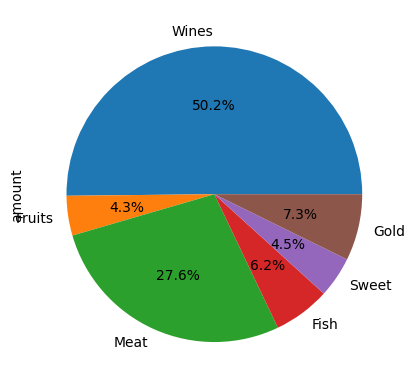

In [ ]:
pd.DataFrame({
    'product': ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'],
    'amount': [df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(), df['MntFishProducts'].sum(), df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
}).set_index('product')['amount'].plot(kind='pie', autopct='%1.1f%%',)

In [ ]:
df.groupby(by=['Is_Living_With_Partner','Is_Parent'])['MntWines', 'MntMeatProducts'].sum()

<ipython-input-230-29e368fbfc9a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Is_Living_With_Partner','Is_Parent'])['MntWines', 'MntMeatProducts'].sum()


MntWines  MntMeatProducts
Is_Living_With_Partner Is_Parent                           
0                      0            179224           117106
                       1             64882            20533
1                      0            186506           143615
                       1            250204            92714

Berdasarkan data, dapat diketahui bahwa
* Wine paling banyak dibeli oleh para pelanggan yang mempunyai pasangan dan anak
* Daging paling banyak dibeli oleh para pelanggan yang mempunyai pasangan tetapi tidak memiliki anak.



## Negative Correlation

In [ ]:
# mencari tahu 1 korelasi yang paling negatif
corr_df.tail(1)

variable 1         variable 2  correlation
252     Income  NumWebVisitsMonth    -0.550066

Semakin tinggi nilai dari kolom Income maka semakin menurun nilai dari kolom NumWebVisitsMonth, ini bisa diartikan pelanggan yang memiliki income lebih tinggi akan cenderung lebih sedikit mengunjungi website.

Tetapi justru, pelanggan yang memiliki income lebih tinggi akan cenderung lebih banyak mengunjungi store.

In [ ]:
corr_df[corr_df['variable 1']=='Income'][corr_df['variable 2']=='NumStorePurchases']

<ipython-input-242-926362402c27>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_df[corr_df['variable 1']=='Income'][corr_df['variable 2']=='NumStorePurchases']


variable 1         variable 2  correlation
30     Income  NumStorePurchases     0.526667

Seaborn dan Matplotlib.pyplot adalah dua pustaka visualisasi data dalam bahasa pemrograman Python yang sering digunakan bersama-sama untuk menciptakan grafik dan plot.
[Rekomendasi Artikel](https://builtin.com/data-science/data-visualization-tutorial)

<Axes: xlabel='NumWebVisitsMonth', ylabel='Income'>

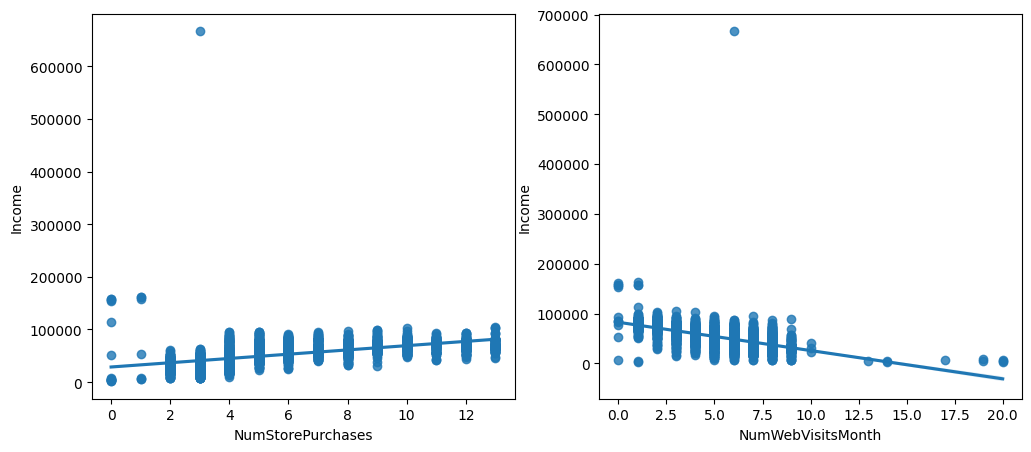

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axes = plt.subplots(1, 2, figsize=(12, 5), squeeze=False)
sns.regplot(ax=axes[0, 0], data=df, x='NumStorePurchases', y='Income')
sns.regplot(ax=axes[0, 1], data=df, x='NumWebVisitsMonth', y='Income')

Melalui dua scatter plot diatas, dapat diketahui ada satu baris data yang outlier karena memiliki nilai pada kolom Income sangat tinggi dan berbeda jauh dari baris-baris data yang lain

In [ ]:
df[df['Income']==df['Income'].max()]

Education    Income  Recency  MntWines  MntFruits  MntMeatProducts  \
2233          2  666666.0       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
2233                8                 1            12                  4  ...   

      Complain  children  AcceptedCmp  Products  Purchases  \
2233         0         1            0        62         11   

      Days_After_Registered  Age  Is_Living_With_Partner  Is_Parent  \
2233                   3960   46                       1          1   

      Family_Size  
2233            0  

[1 rows x 24 columns]

# Data Modelling

Yellowbrick adalah suatu pustaka visualisasi yang memperluas kemampuan dari pustaka Matplotlib dan Scikit-learn dalam Python. Yellowbrick mengintegrasikan visualisasi secara langsung menggunakan API yang serupa dengan API machine learning di Scikit-learn.

metode Elbow digunakan untuk mencari nilai "k" yang paling baik atau optimal yang menggambarkan variasi yang signifikan dalam data tanpa terlalu overfitting atau underfitting. Jika menggunakan K-Means, prosesnya melibatkan berbagai nilai "k" dan mengukur seberapa baik model tersebut memasukkan data ke dalam klaster-klasternya. Kemudian, nilai inertia divisualisasikan dalam grafik, yang mencatat jumlah jarak kuadrat antara titik data dan pusat klaster tempat titik tersebut berada. Pada grafik ini, kita mencari titik di mana penurunan inertia tidak lagi signifikan, membentuk pola seperti siku. Titik inilah yang disebut "elbow," dan nilai "k" yang sesuai dengan titik tersebut dianggap sebagai jumlah klaster yang optimal.
[Rekomendasi video](https://www.youtube.com/watch?v=ht7geyMAFfA)

 k-Means adalah algoritma clustering yang membagi data yang emiliki kemiripan yang tinggi ke dalam kelompok-kelompok, sementara data antar-kelompok memiliki kemiripan yang rendah. [Rekomendasi artikel](https://medium.com/ai-made-simple/k-means-clustering-e9bd722a09fa)

 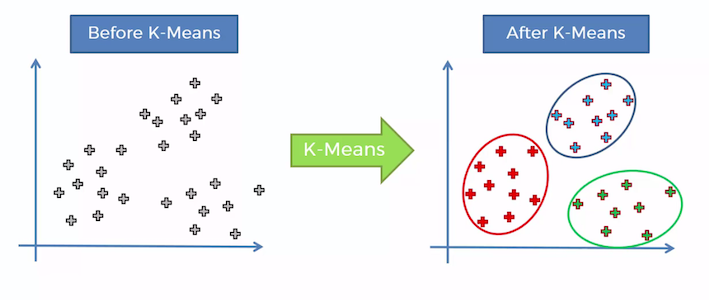


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow = KElbowVisualizer(KMeans(), k=7)
Elbow.fit(data)
Elbow.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# menjalankan model
model = KMeans(n_clusters=4, init='random', algorithm='elkan', random_state=0).fit(data)

# memasukkan hasil klater ke dataset
df['cluster'] = model.labels_
df.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0          2  58138.0       58       635         88              546   
1          2  46344.0       38        11          1                6   
2          2  71613.0       26       426         49              127   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              172                88            88                  3  ...   
1                2                 1             6                  2  ...   
2              111                21            42                  1  ...   

   children  AcceptedCmp  Products  Purchases  Days_After_Registered  Age  \
0         0            1      1617         25                   4263   66   
1         2            0        27          6                   3417   69   
2         0            0       776         21                   3764   58   

   Is_Living_With_Partner  Is_Parent  Family_Size  cluster  
0                       0          0            0        2  
1                       0          0            0        0  
2                       1          0            0        2  

[3 rows x 25 columns]

t-SNE dapat menghasilkan visualisasi yang lebih bersifat semantik, di mana titik-titik yang dekat satu sama lain dalam ruang hasil t-SNE mungkin memiliki kemiripan dalam arti atau makna tertentu.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2240 samples in 0.003s...
[t-SNE] Computed neighbors for 2240 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2240
[t-SNE] Computed conditional probabilities for sample 2000 / 2240
[t-SNE] Computed conditional probabilities for sample 2240 / 2240
[t-SNE] Mean sigma: 1.237111
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.876633
[t-SNE] KL divergence after 1000 iterations: 1.344789


<Axes: xlabel='comparator 1', ylabel='comparator 2'>

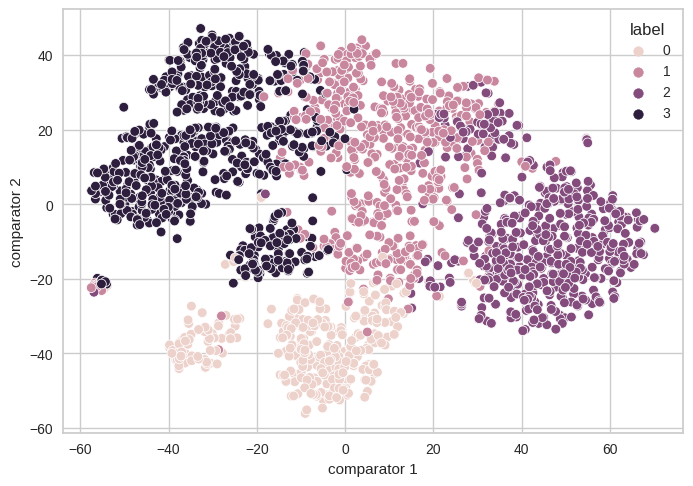

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
data_reduction = tsne.fit_transform(data)
tsne_df = pd.DataFrame({
    'label':df['cluster'],
    'comparator 1':data_reduction[:,0],
    'comparator 2':data_reduction[:,1]
})

sns.scatterplot(x="comparator 1", y="comparator 2", hue='label',data=tsne_df)

Berdasarkan bar chart di bawah ini, dapat diketahui bahwa cluster 3 memiliki baris data yang paling banyak dan cluster 0 memiliki baris data yang paling sedikit.

<Axes: >

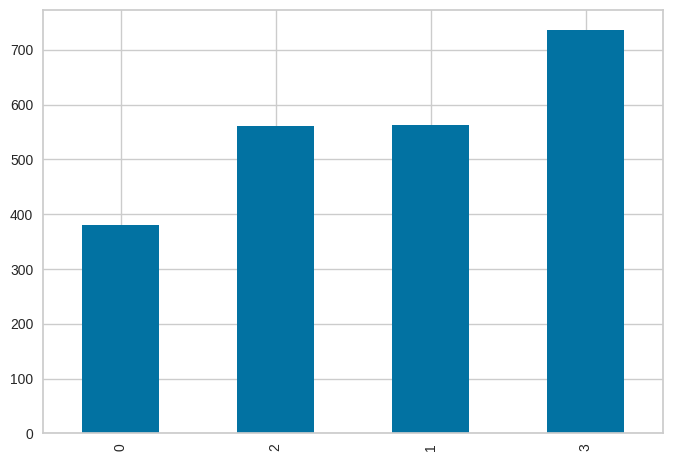

In [ ]:
df['cluster'].value_counts().sort_values().plot(kind='bar')

# Cluster Profiling

Menggunakan visualisasi data, kita akan mengamati hasil klater yang terbentuk berdasarkan profil pelanggan diantaranya Purchases, Products, Is_Living_With_Partner, dan Is_Parent menggunakan statistik deskriptif.

Pengamatan karakteristik, rata-rata jumlah produk yang telah dibeli selama 2 tahun terakhir:
* Klaster 0 = 140
* Klaster 1 = 800
* Klaster 2 = 1400
* Klaster 3 = 100



In [ ]:
df.groupby(by='cluster')['Products'].describe()['mean'].to_frame()

mean
cluster             
0         137.236842
1         798.229130
2        1390.866310
3         102.118207

Pengamatan karakteristik, rata-rata jumlah transaksi pembelian yang telah dilakukan selama 2 tahun terakhir:
* Klaster 0 = 9
* Klaster 1 = 22
* Klaster 2 = 21
* Klaster 3 = 8

In [ ]:
df.groupby(by='cluster')['Purchases'].describe()['mean'].to_frame()

mean
cluster           
0         8.576316
1        21.918295
2        20.736185
3         8.232337

* Klaster 0 didominasi oleh pelanggan yang tidak memiliki anak
* Klaster 1 didominasi oleh pelanggan yang memiliki anak
* Klaster 2 didominasi oleh pelanggan yang tidak memiliki anak
* Klaster 3 dipenuhi oleh pelanggan yang memiliki anak



In [ ]:
df.groupby(by=['cluster','Is_Parent'])['Is_Parent'].count().to_frame()

Is_Parent
cluster Is_Parent           
0       0                376
        1                  4
1       0                 93
        1                470
2       0                487
        1                 74
3       1                736

* Klaster 0 didominasi oleh pelanggan yang tidak memiliki pasangan
* Klaster 1 didominasi oleh pelanggan yang memiliki pasangan
* Klaster 2 didominasi oleh pelanggan yang memiliki pasangan
* Klaster 3 didominasi oleh pelanggan yang memiliki pasangan

In [ ]:
df.groupby(by=['cluster','Is_Living_With_Partner'])['Is_Living_With_Partner'].count().to_frame()

Is_Living_With_Partner
cluster Is_Living_With_Partner                        
0       0                                          289
        1                                           91
1       0                                          174
        1                                          389
2       0                                          222
        1                                          339
3       0                                          111
        1                                          625

* Klaster 0 merupakan pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 35000 dollar
* Klaster 1 merupakan pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 60000 dollar
* Klaster 2 merupakan pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 78000 dollar
* Klaster 2 merupakan pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 37000 dollar



In [ ]:
df.groupby(by='cluster')['Income'].describe()['mean'].to_frame()

mean
cluster              
0        34673.709085
1        59221.881300
2        77123.624955
3        37018.831621

# Conclusion

**Insight**
* Wine adalah barang yang banyak dibeli terutama oleh pelanggan yang memiliki pasangan dan anak
* Pelanggan yang memiliki income tinggi cenderung akan memiliki melakukan transaksi pembelian di store daripada melalui website

**Hasil Klasterisasi**

Klaster 0
* rata-rata jumlah produk yang telah dibeli selama 2 tahun terakhir adalah 140
* rata-rata jumlah transaksi pembelian yang telah dilakukan selama 2 tahun terakhir adalah 9
* didominasi oleh pelanggan yang tidak memiliki anak dan pasangan
* para pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 35000 dollar

Klaster 1
* rata-rata jumlah produk yang telah dibeli selama 2 tahun terakhir adalah 800
* rata-rata jumlah transaksi pembelian yang telah dilakukan selama 2 tahun terakhir adalah 21
* didominasi oleh pelanggan yang memiliki anak dan pasangan
* para pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 60000 dollar

Klaster 2
* rata-rata jumlah produk yang telah dibeli selama 2 tahun terakhir adalah 1400
* rata-rata jumlah transaksi pembelian yang telah dilakukan selama 2 tahun terakhir adalah 22
* didominasi oleh pelanggan yang memiliki pasangan dan tidak memiliki anak
* para pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 78000 dollar

Klaster 3
* rata-rata jumlah produk yang telah dibeli selama 2 tahun terakhir adalah 100
* rata-rata jumlah transaksi pembelian yang telah dilakukan selama 2 tahun terakhir adalah 8
* didominasi oleh pelanggan yang memiliki anak dan pasangan
* pelanggan yang memiliki rata-rata pendapatan rumah per tahunnya sekitar 37000 dollar
